Saving download.jpg to download.jpg


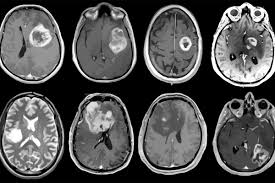

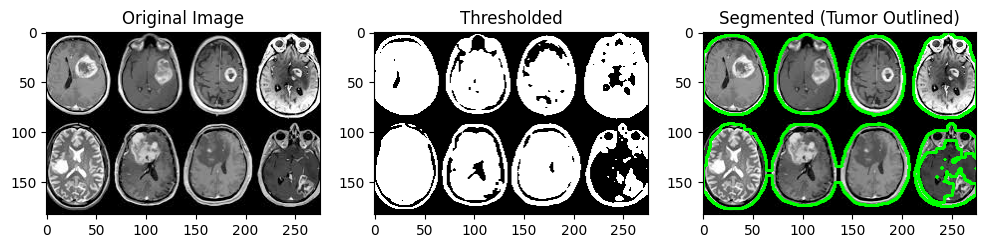

In [ ]:
# STEP 1: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import Image, display

# STEP 2: Upload Image
uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn

# STEP 3: Read and display original image
image = cv2.imread(image_path)
cv2_imshow(image)
cv2.waitKey(0)

# STEP 4: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# STEP 5: Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# STEP 6: Apply thresholding (Otsu's Method)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# STEP 7: Morphological operations (optional cleanup)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# STEP 8: Find contours
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
segmented = image.copy()
cv2.drawContours(segmented, contours, -1, (0, 255, 0), 2)

# STEP 9: Display Results
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title("Segmented (Tumor Outlined)")

plt.show()